In [77]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression 


In [78]:
data=pd.read_csv('./housing.csv')

In [79]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [81]:
data.dropna(inplace=True)

In [82]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [83]:

label_encoder = preprocessing.LabelEncoder()
  
data["ocean_proximity"]= label_encoder.fit_transform(data["ocean_proximity"])
  
data["ocean_proximity"].unique()


array([3, 0, 1, 4, 2])

In [84]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


After changing all the data to numbers, then visualize


In [85]:
X = data.drop(["median_house_value"],axis=1)
y = data["median_house_value"]

In [115]:
#it generates new minority values to balance the unblalanced data

from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.over_sampling import ADASYN 
os=SMOTE(k_neighbors=2)
# ada = ADASYN(sampling_strategy='minority', n_neighbors=1)
# X_res, y_res = ada.fit_resample(X, y)

os=BorderlineSMOTE(k_neighbors=3)
X_res,y_res=os.fit_resample(X,y)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 4

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [88]:
# train_data['total_rooms']=np.log(train_data['total_rooms']+1)
# train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
# train_data['population']=np.log(train_data['population']+1)
# train_data['households']=np.log(train_data['households']+1)

# train_data.hist(figsize=(15,8))

<AxesSubplot:>

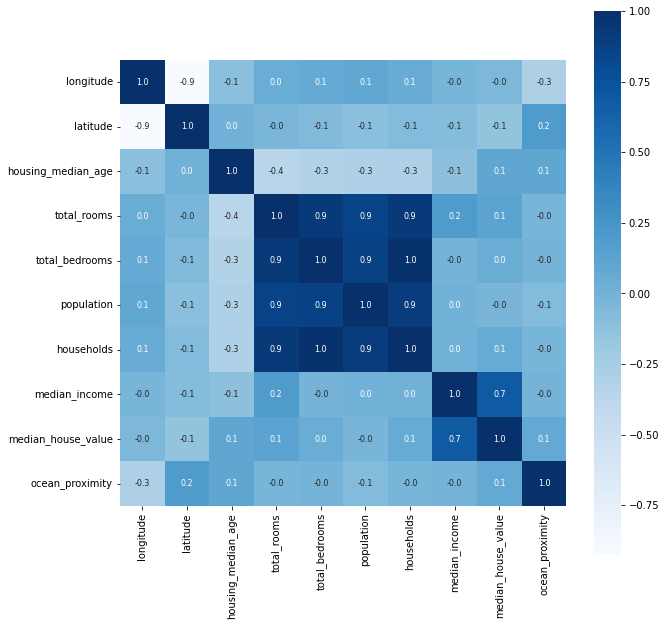

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

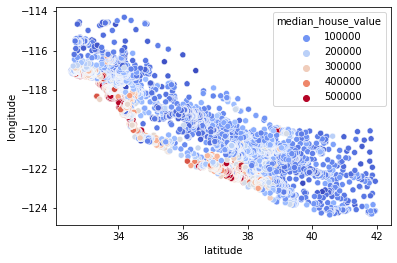

In [90]:
sns.scatterplot(x="latitude",y="longitude",data=data,hue="median_house_value",palette="coolwarm")

In [91]:
# train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
# train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

In [92]:
# plt.figure(figsize=(10,10))
# sns.heatmap(train_data.corr(),cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')



In [101]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

reg.fit(X_train,Y_train)

LinearRegression()

In [102]:
reg.score(X_test,Y_test)

0.5136389618273439

In [116]:
model_GBR=GradientBoostingRegressor()
model_GBR.fit(X_train,Y_train)

GradientBoostingRegressor()

In [117]:
model_GBR.score(X_test,Y_test)


0.8069965779115392